# Analysis of Mortgage Loans in New York

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("state_NY.csv")

/var/folders/km/vd961byj21d2vgpgtcvkn3940000gn/T/ipykernel_27220/1305725136.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("state_NY.csv")


In [3]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,5493000YNV8IX4VD3X12,35614,NY,36005.0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,...,NaN,NaN,NaN,2142,32.31,99000,109,339,411,70
1,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
2,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
3,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
4,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 99 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             548905 non-null  int64  
 1   lei                                       548905 non-null  object 
 2   derived_msa-md                            548905 non-null  int64  
 3   state_code                                548905 non-null  object 
 4   county_code                               546170 non-null  float64
 5   census_tract                              545678 non-null  float64
 6   conforming_loan_limit                     542121 non-null  object 
 7   derived_loan_product_type                 548905 non-null  object 
 8   derived_dwelling_category                 548905 non-null  object 
 9   derived_ethnicity                         548905 non-null  object 
 10  derived_race        

In [5]:
df.describe()

,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,548905.0,548905.000000,546170.000000,5.456780e+05,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,...,21822.000000,3870.000000,408.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000
mean,2022.0,37728.963132,36067.149089,3.606729e+10,2.326740,3.624775,1.977045,1.151248,10.772431,1.192013,...,4.611905,5.774677,6.676471,4355.951633,35.207657,105287.507128,115.019315,1086.430601,1389.937102,45.478893
std,0.0,20457.472502,31.373077,5.697364e+07,1.712161,13.556269,0.149760,0.437351,13.833607,0.393884,...,2.779067,2.692355,2.479049,1674.607272,27.663736,24039.540445,51.064993,545.334419,658.512267,23.658732
min,2022.0,0.000000,36001.000000,6.001431e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,35004.000000,36047.000000,3.604706e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,4.000000,5.000000,3160.000000,13.520000,91100.000000,86.000000,667.000000,951.000000,37.000000
50%,2022.0,35614.000000,36065.000000,3.606502e+10,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,6.000000,6.000000,4264.000000,25.520000,99000.000000,107.000000,1059.000000,1425.000000,52.000000
75%,2022.0,39100.000000,36091.000000,3.609106e+10,3.000000,1.000000,2.000000,1.000000,31.000000,1.000000,...,7.000000,9.000000,9.000000,5420.000000,48.040000,115700.000000,131.000000,1479.000000,1838.000000,63.000000
max,2022.0,99999.000000,36123.000000,4.820141e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,17222.000000,100.000000,146400.000000,292.000000,2946.000000,4742.000000,80.000000


<Axes: >

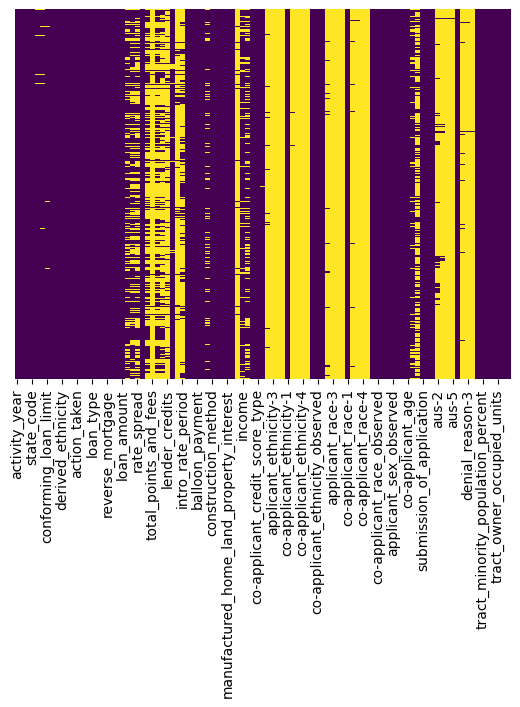

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Correlation Heatmap')

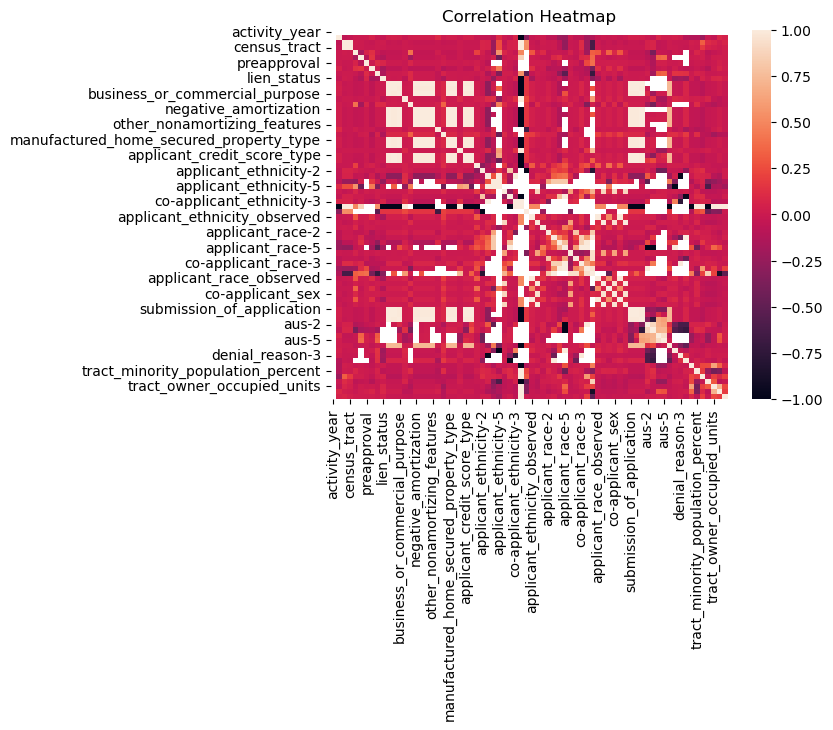

In [7]:
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix,vmin=-1,vmax=1)
heatmap.set_title("Correlation Heatmap")

# Categorical Data

In [8]:
categorical_columns = ['derived_loan_product_type','derived_dwelling_category','conforming_loan_limit','derived_ethnicity','derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_purpose', 
                        'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'hoepa_status', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features',
                        'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'debt_to_income_ratio', 'co-applicant_credit_score_type',
                       'applicant_age','co-applicant_age','submission_of_application', 'initially_payable_to_institution', 'aus-1']

# CLEANUP

In [9]:
df_clean = df.drop(columns=[
    'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5',  # derived_race
    'applicant_sex','applicant_sex_observed','co-applicant_sex', 'co-applicant_sex_observed', # derived_sex
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', #derived_ethnicity
    'construction_method', 'total_units', # derived_dwelling_category
    'lien_status', 'loan_type', # derived_loan_product_type
    'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage'# derived_msa-md
])

<Axes: >

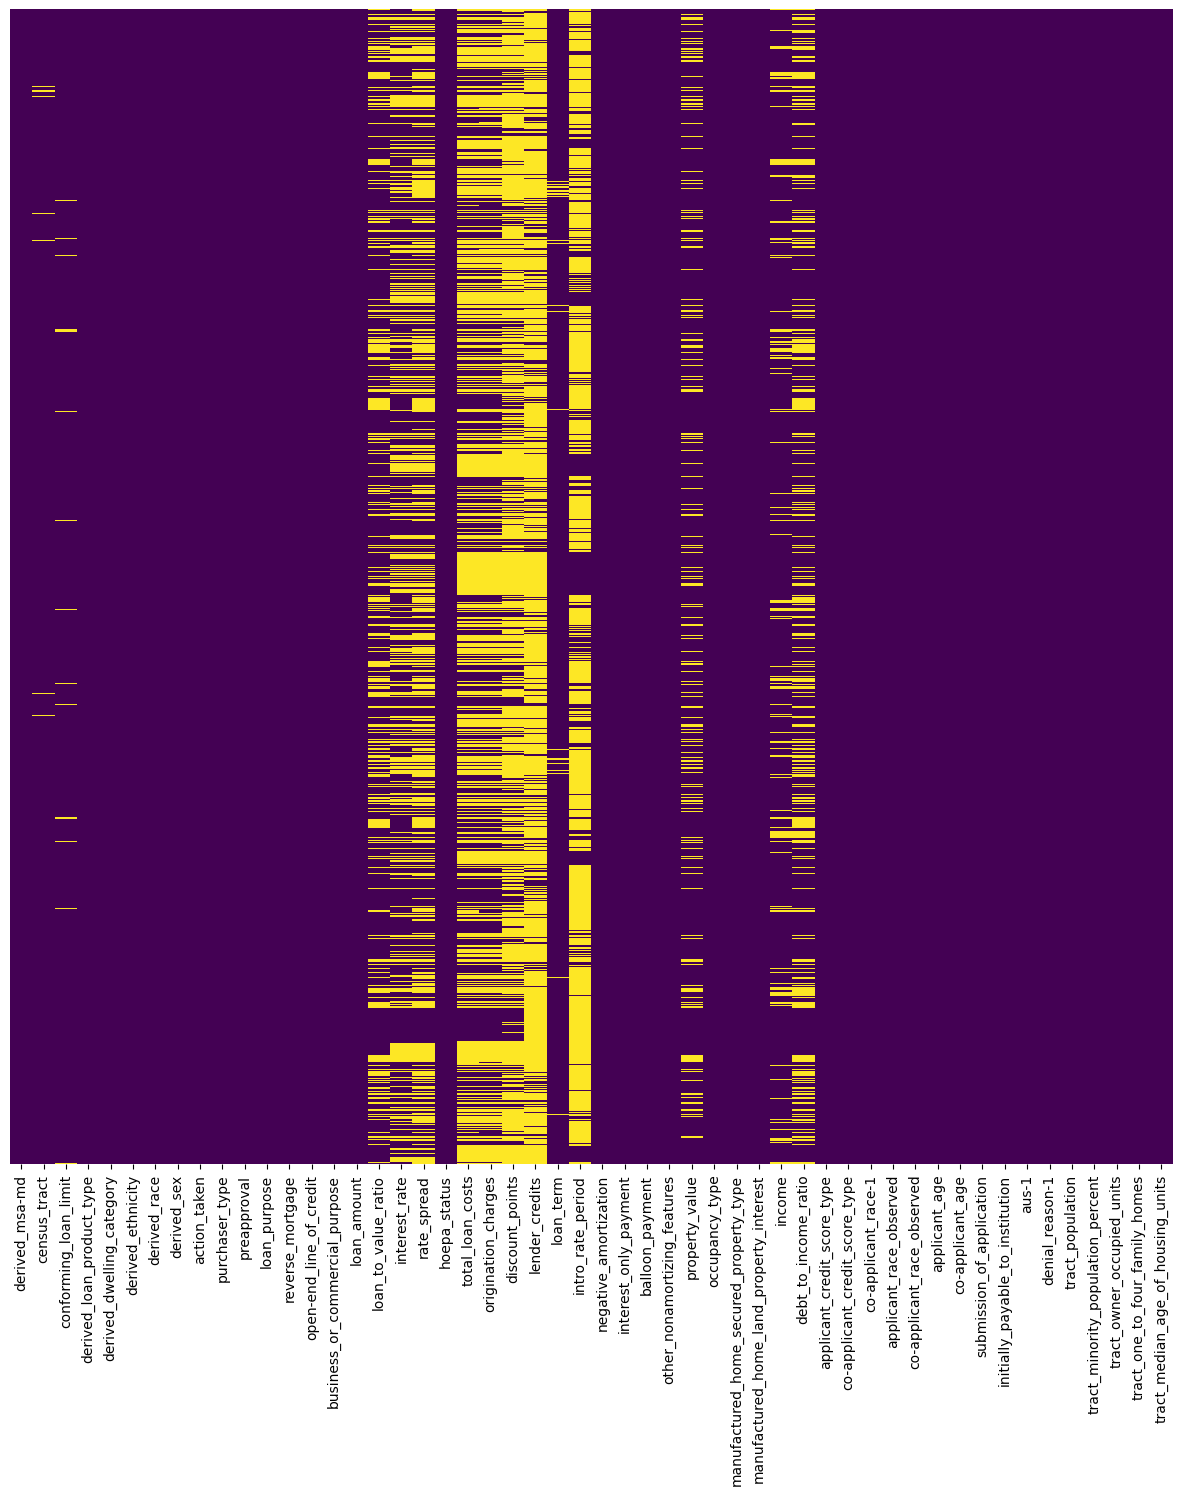

In [10]:
# Heatmap on all data.
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

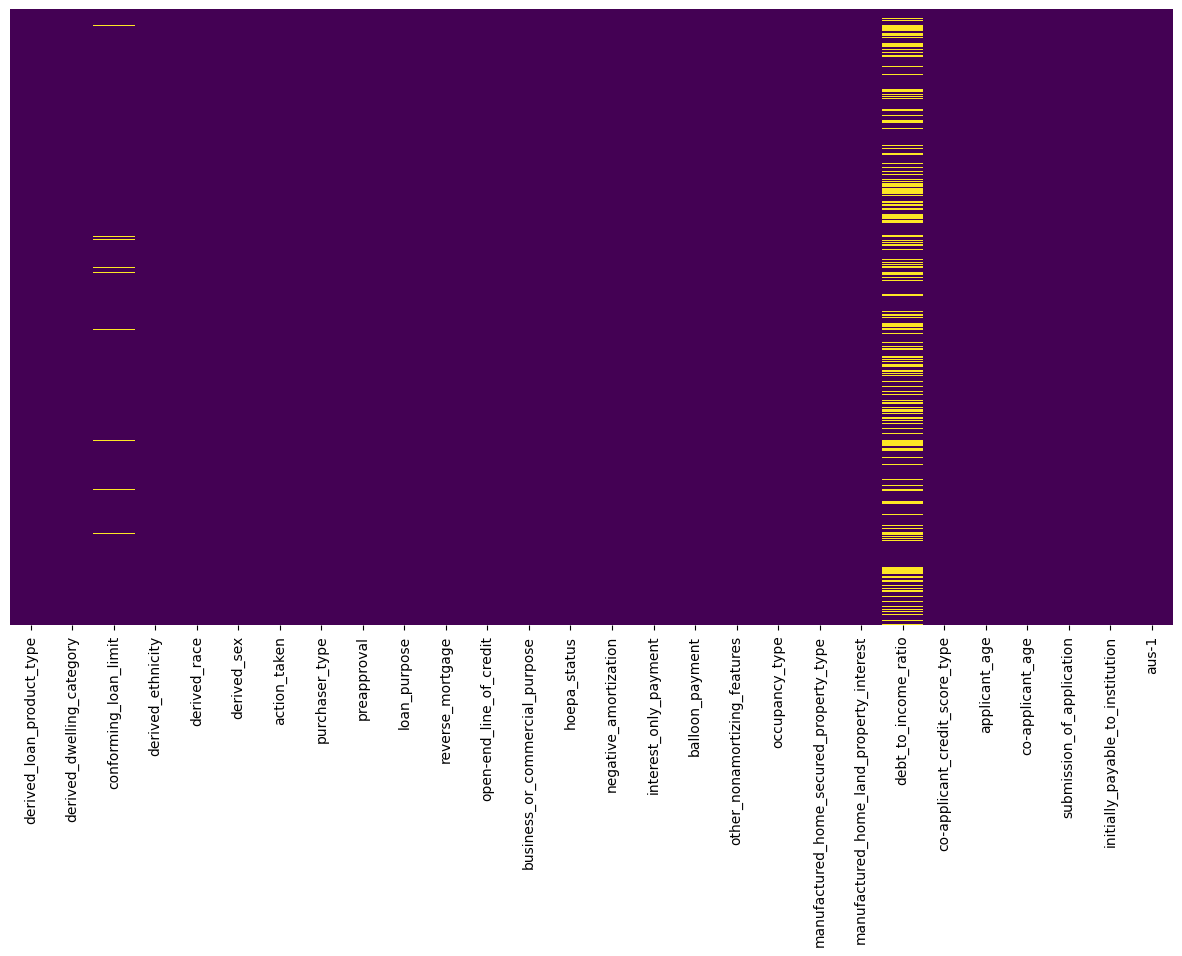

In [11]:
# Heatmap on categorical data.
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean[categorical_columns].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

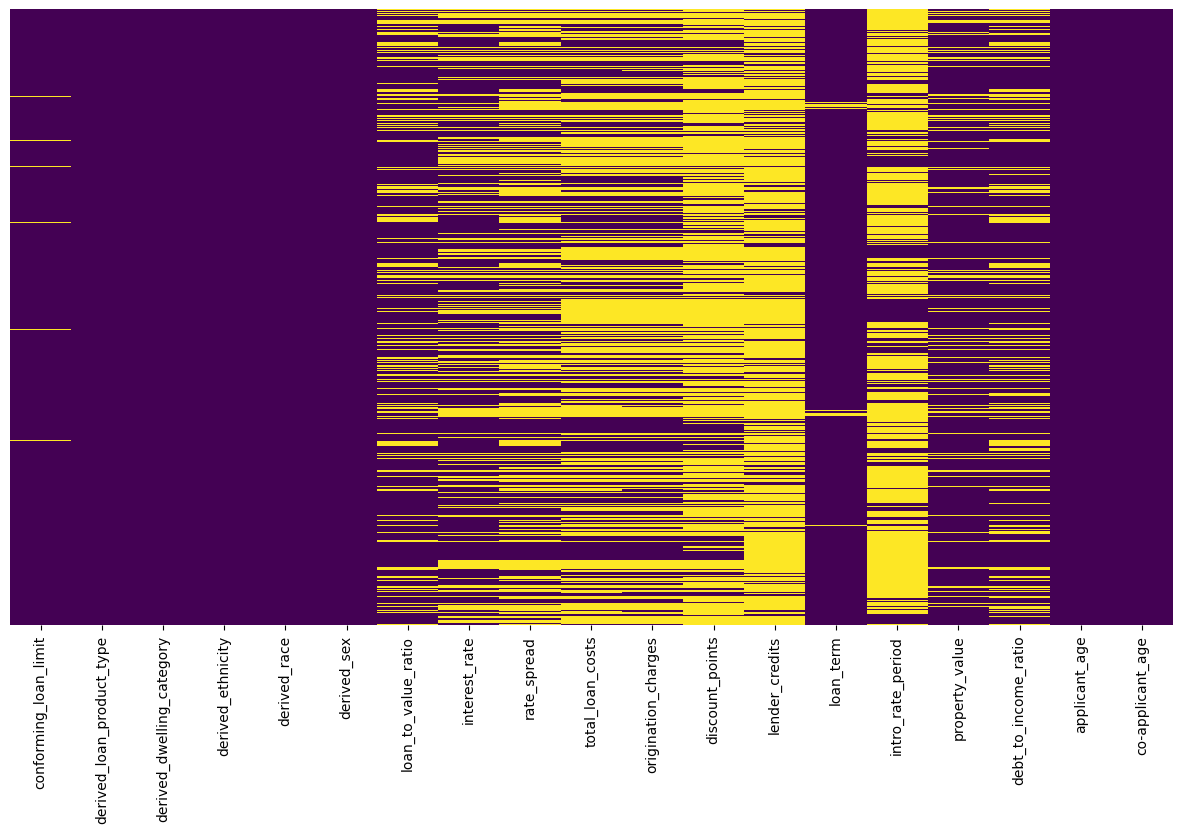

In [12]:
# Heatmap on object type data
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.select_dtypes(include=['object']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

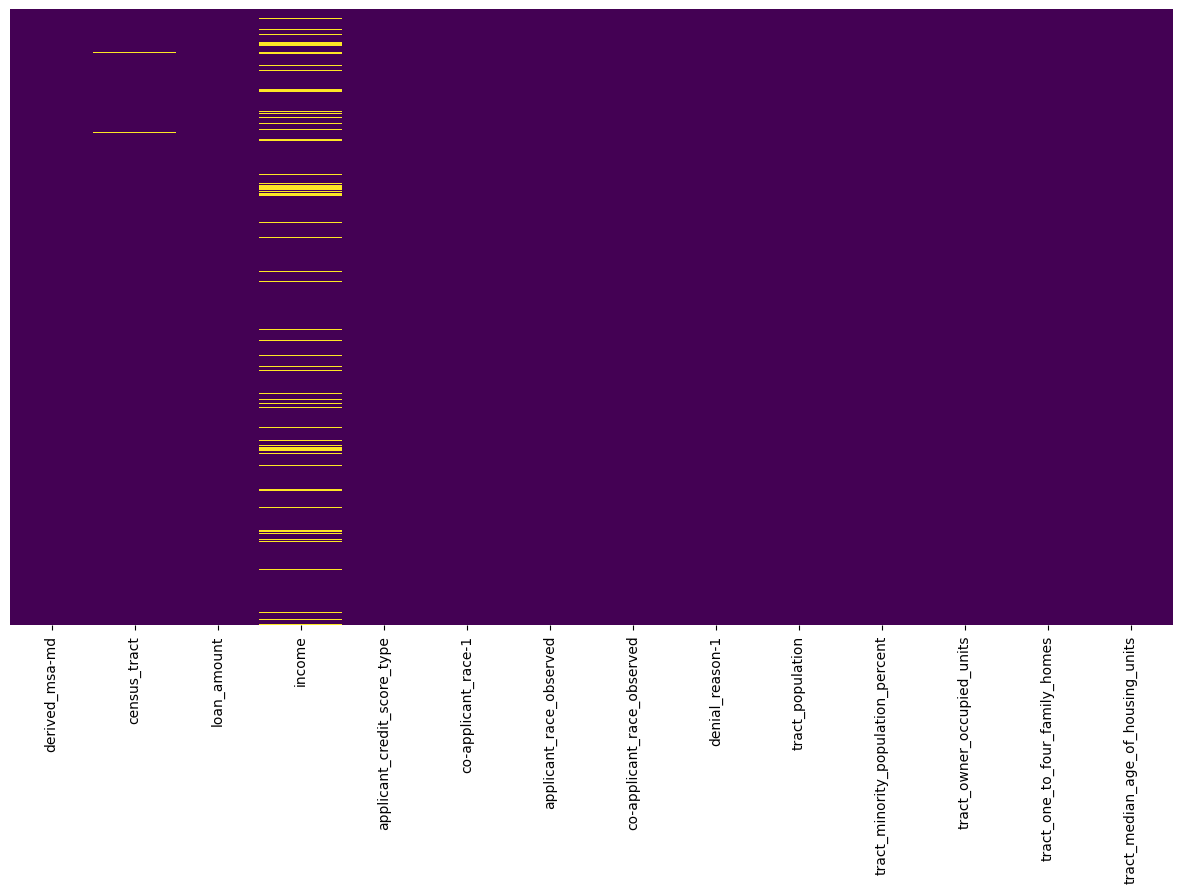

In [13]:
# Heatmap on number type data excluding categorical columns
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.drop(columns=categorical_columns).select_dtypes(include=['int64','float64']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Columns after cleanup

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 52 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   derived_msa-md                            548905 non-null  int64  
 1   census_tract                              545678 non-null  float64
 2   conforming_loan_limit                     542121 non-null  object 
 3   derived_loan_product_type                 548905 non-null  object 
 4   derived_dwelling_category                 548905 non-null  object 
 5   derived_ethnicity                         548905 non-null  object 
 6   derived_race                              548905 non-null  object 
 7   derived_sex                               548905 non-null  object 
 8   action_taken                              548905 non-null  int64  
 9   purchaser_type                            548905 non-null  int64  
 10  preapproval         

In [15]:
df_clean.describe()

,derived_msa-md,census_tract,action_taken,purchaser_type,preapproval,loan_purpose,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,...,co-applicant_race_observed,submission_of_application,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,548905.000000,5.456780e+05,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,5.489050e+05,...,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000
mean,37728.963132,3.606729e+10,2.326740,3.624775,1.977045,10.772431,32.480232,31.918917,32.539226,4.433491e+05,...,3.214789,31.412093,31.395721,34.640076,28.375859,4355.951633,35.207657,1086.430601,1389.937102,45.478893
std,20457.472502,5.697364e+07,1.712161,13.556269,0.149760,13.833607,181.321025,180.293821,181.663109,2.738600e+06,...,0.955640,180.347997,180.350862,181.704577,145.315004,1674.607272,27.663736,545.334419,658.512267,23.658732
min,0.000000,6.001431e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35004.000000,3.604706e+10,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.150000e+05,...,2.000000,1.000000,1.000000,1.000000,10.000000,3160.000000,13.520000,667.000000,951.000000,37.000000
50%,35614.000000,3.606502e+10,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.450000e+05,...,4.000000,1.000000,1.000000,6.000000,10.000000,4264.000000,25.520000,1059.000000,1425.000000,52.000000
75%,39100.000000,3.609106e+10,3.000000,1.000000,2.000000,31.000000,2.000000,2.000000,2.000000,4.750000e+05,...,4.000000,1.000000,1.000000,6.000000,10.000000,5420.000000,48.040000,1479.000000,1838.000000,63.000000
max,99999.000000,4.820141e+10,8.000000,72.000000,2.000000,32.000000,1111.000000,1111.000000,1111.000000,9.000050e+08,...,4.000000,1111.000000,1111.000000,1111.000000,1111.000000,17222.000000,100.000000,2946.000000,4742.000000,80.000000


# OneHotEncoder on categorical data

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
df_clean_encoded_categorical = pd.get_dummies(df_clean,columns=categorical_columns)

In [18]:
df_clean_encoded_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Columns: 184 entries, derived_msa-md to aus-1_1111
dtypes: bool(160), float64(5), int64(9), object(10)
memory usage: 184.3+ MB


In [19]:
df_clean_encoded_categorical.head()

,derived_msa-md,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,discount_points,lender_credits,...,initially_payable_to_institution_3,initially_payable_to_institution_1111,aus-1_1,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7,aus-1_1111
0,35614,3.600505e+10,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
1,0,NaN,215000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
2,0,NaN,415000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
3,0,NaN,1425000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
4,0,NaN,885000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False


In [20]:
df_clean_encoded_categorical.describe()

,derived_msa-md,census_tract,loan_amount,income,applicant_credit_score_type,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,denial_reason-1,tract_population,tract_minority_population_percent,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,548905.000000,5.456780e+05,5.489050e+05,4.942560e+05,548905.000000,548857.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000,548905.000000
mean,37728.963132,3.606729e+10,4.433491e+05,1.940595e+02,35.150274,6.881107,2.101265,3.214789,28.375859,4355.951633,35.207657,1086.430601,1389.937102,45.478893
std,20457.472502,5.697364e+07,2.738600e+06,3.230113e+03,179.474526,2.128650,0.397353,0.955640,145.315004,1674.607272,27.663736,545.334419,658.512267,23.658732
min,0.000000,6.001431e+09,5.000000e+03,-1.150200e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35004.000000,3.604706e+10,1.150000e+05,7.100000e+01,2.000000,5.000000,2.000000,2.000000,10.000000,3160.000000,13.520000,667.000000,951.000000,37.000000
50%,35614.000000,3.606502e+10,2.450000e+05,1.120000e+02,6.000000,8.000000,2.000000,4.000000,10.000000,4264.000000,25.520000,1059.000000,1425.000000,52.000000
75%,39100.000000,3.609106e+10,4.750000e+05,1.770000e+02,9.000000,8.000000,2.000000,4.000000,10.000000,5420.000000,48.040000,1479.000000,1838.000000,63.000000
max,99999.000000,4.820141e+10,9.000050e+08,1.946619e+06,1111.000000,44.000000,3.000000,4.000000,1111.000000,17222.000000,100.000000,2946.000000,4742.000000,80.000000


# PCA on OneHotEncoded categorical without object types where all rows != NaN

In [21]:
df_clean_object_columns = df_clean_encoded_categorical.select_dtypes(include=['object']).columns
df_clean_object_columns

Index(['loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'total_loan_costs', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'intro_rate_period', 'property_value'],
      dtype='object')

In [22]:
df_clean_encoded_categorical_without_objects = df_clean_encoded_categorical.drop(columns=df_clean_object_columns)
df_clean_encoded_categorical_without_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Columns: 174 entries, derived_msa-md to aus-1_1111
dtypes: bool(160), float64(5), int64(9)
memory usage: 142.4 MB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


df_clean_categorical_without_objects_dropna = df_clean_encoded_categorical_without_objects.dropna()

X = df_clean_categorical_without_objects_dropna.drop(columns=['denial_reason-1'])
y = df_clean_categorical_without_objects_dropna['denial_reason-1']
columns = df_clean_categorical_without_objects_dropna.columns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [24]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)

In [25]:
# svm = SVC(kernel='linear', C=1)
# svm.fit(X_train_pca, y_train)
# svm_predictions = svm.predict(X_test_pca)

# print(classification_report(y_test, rf_predictions, target_names=names))